In [4]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from numpy.fft import fftshift, fft2, fftfreq
import scipy
from detection.template_matching import template_match_das, correlate_das

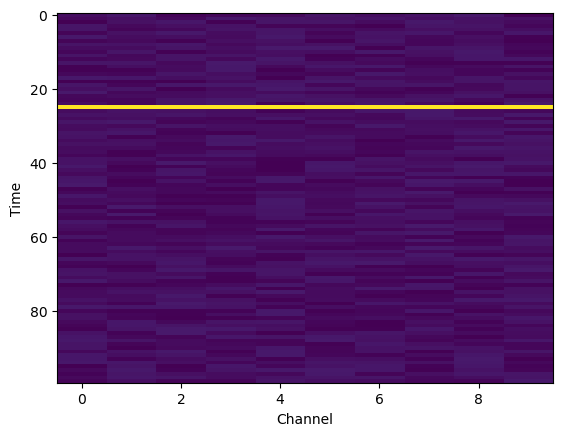

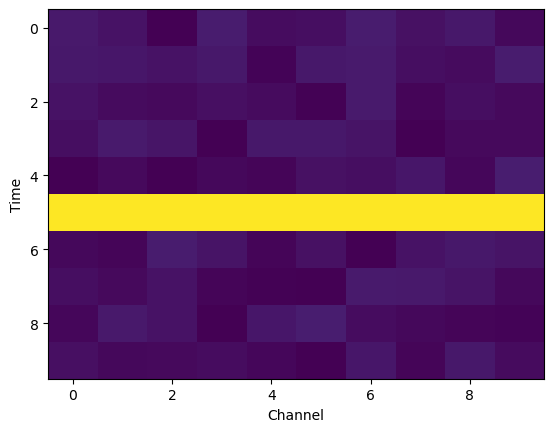

In [5]:
# set parameters for making synthetic data
num_channels = 10
num_data_samples = 100
num_template_samples = 10

# define synthetic data
data = np.random.rand(num_data_samples,num_channels)-0.5
data[25,:] = 14

# visualize synthetic data
plt.imshow(data,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

# define synthetic template
data_template = np.random.rand(num_template_samples,num_channels)-0.5
data_template[5,:] = 12

# visualize synthetic template
plt.imshow(data_template,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

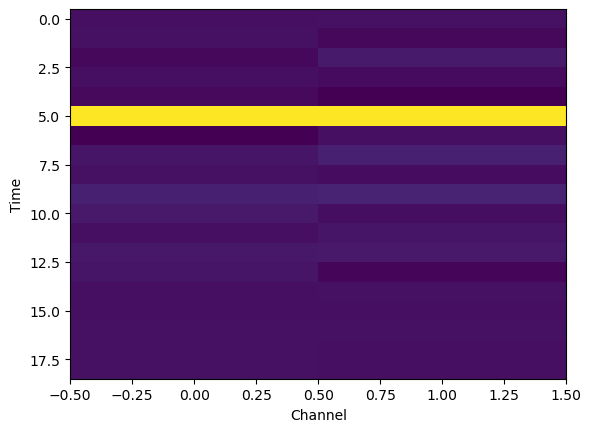

In [6]:
# test correlation function
corr = correlate_das(data[24:34,:2],data_template[:,:2],"channel")

# visualize correlation function
plt.imshow(corr,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

# test das template matching fuction
tem = template_match_das(data_template,data,10)

In [30]:
# choose channels 
channels = [0,1720]

# read real data
fname = '/data/fast0/veronica-scratch/us7000i9bw.h5'
quake_id = fname.split("/")[-1].split(".")[0]
data_file = h5py.File(fname,'r')
data = np.array(data_file['Acquisition/Raw[0]/RawData'][:,channels[0]:channels[1]])
timestamps = np.array(data_file['Acquisition/Raw[0]/RawDataTime']) # time is microseconds since 1970-01-01
times = [datetime.datetime.fromtimestamp(t/1000000) for t in timestamps]

In [9]:
# choose a subset of the data to use as a template
template = data[75000:175000,:]

# plot the template
#plt.imshow(np.transpose(template),aspect="auto",vmin=-10,vmax=10,cmap="gray")
#plt.show()

# run the template matching code
corrs = template_match_das(template,data,template.shape[0])

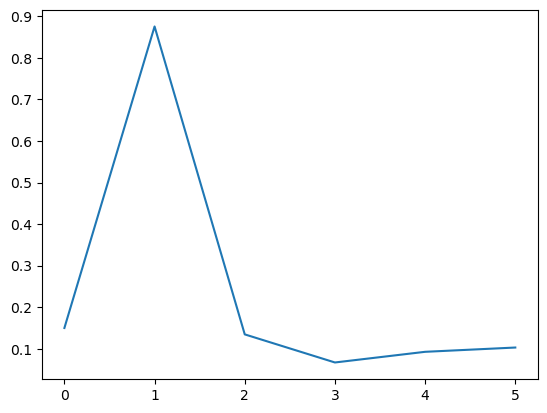

In [11]:
plt.plot(corrs)

In [18]:
t[0]

1663610759997253

In [41]:
import glob
file_list = glob.glob("/data/fast0/veronica-scratch/*")
for f in file_list:
    
    # read the file
    current_file = h5py.File(f,'r')
    
    # get start and endtime
    timestamps = np.array(data_file['Acquisition/Raw[0]/RawDataTime'])
    times = [datetime.datetime.fromtimestamp(t/1000000) for t in timestamps]
    
    # set output filename
    new_fname = quake_id + "_" + times[0].strftime("%Y-%m-%dT%H:%M:%S") + "_" + times[-1].strftime("%Y-%m-%dT%H:%M:%S") + ".h5"
    
    # save new h5 file

['/data/fast0/veronica-scratch/us7000ia36.h5',
 '/data/fast0/veronica-scratch/us7000i9bw.h5',
 '/data/fast0/veronica-scratch/us7000i90q.h5',
 '/data/fast0/veronica-scratch/us7000i7ya.h5',
 '/data/fast0/veronica-scratch/us6000iitd.h5',
 '/data/fast0/veronica-scratch/us7000i53f.h5',
 '/data/fast0/veronica-scratch/us6000i5rd.h5',
 '/data/fast0/veronica-scratch/us6000hm9j.h5',
 '/data/fast0/veronica-scratch/us7000h8g3.h5',
 '/data/fast0/veronica-scratch/us7000gymk.h5',
 '/data/fast0/veronica-scratch/us7000gyj0.h5',
 '/data/fast0/veronica-scratch/us6000h6nr.h5',
 '/data/fast0/veronica-scratch/us6000h6ne.h5',
 '/data/fast0/veronica-scratch/us7000j2yw.h5',
 '/data/fast0/veronica-scratch/us6000j6w8.h5',
 '/data/fast0/veronica-scratch/us7000irfb.h5',
 '/data/fast0/veronica-scratch/us7000iqpn.h5',
 '/data/fast0/veronica-scratch/us7000ip8h.h5',
 '/data/fast0/veronica-scratch/us7000ip0l.h5',
 '/data/fast0/veronica-scratch/us7000ingi.h5',
 '/data/fast0/veronica-scratch/us7000ingh.h5',
 '/data/fast0